# Описание проекта.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Импорт необходимых библиотек:

In [91]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from pandas.plotting import register_matplotlib_converters
import warnings

## Приоритизация гипотез.

### Загрузка и изучение данных из файлов

In [92]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(HTML("<font color='green'>-------------------------------------------------------</font>"))
display(HTML("<font color='green'>ОБЩАЯ ИНФОРМАЦИЯ HYPOTHESIS</font>"))
display(HTML("<font color='green'>-------------------------------------------------------</font>"))
hypothesis.info()
display(HTML("<font color='green'>-----------------------------------------------------------------</font>"))
display(HTML("<font color='green'>ОПИСАТЕЛЬНАЯ СТАТИСТИКА HYPOTHESIS</font>"))
display(HTML("<font color='green'>-----------------------------------------------------------------</font>"))
hypothesis.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


### Привёл названия к нижнему регистру,

In [93]:
hypothesis.columns = hypothesis.columns.str.lower()

### Подсчёт количества дубликатов.

In [94]:
print("Дублирующихся строк в таблице hypothesis:", hypothesis.duplicated().sum())

Дублирующихся строк в таблице hypothesis: 0


### Подсчёт количества пропусков.

In [95]:
print("Пропусков в таблице hypothesis:", hypothesis.isna().sum().sum())

Пропусков в таблице hypothesis: 0


### Фреймворк ICE для приоритизации гипотез.

In [96]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000



Самые приоритетные гипотезы 8, 0, 7.

### Фреймворк RICE для приоритизации гипотез.

In [97]:
display(hypothesis)
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis','rice']].sort_values(by = 'rice',ascending = False))

,hypothesis,reach,impact,confidence,efforts,ice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0



Самые приоритетные гипотезы 7, 2, 0, но на этот раз на 1 месте на первом месте гипотеза под номером 7. Так получилось потому что её параметр "REACH(скольких пользователей затронет изменение, которое вы хотите внести)" равен 10.

## Анализ A/B-теста.

### Загрузка и изучение данных из файлов

In [98]:
orders = pd.read_csv('/datasets/orders.csv')
display(HTML("<font color='green'>-------------------------------------------------------</font>"))
display(HTML("<font color='green'>ОБЩАЯ ИНФОРМАЦИЯ ORDERS</font>"))
display(HTML("<font color='green'>-------------------------------------------------------</font>"))
orders.info()
display(HTML("<font color='green'>-----------------------------------------------------------------</font>"))
display(HTML("<font color='green'>ОПИСАТЕЛЬНАЯ СТАТИСТИКА ORDERS</font>"))
display(HTML("<font color='green'>-----------------------------------------------------------------</font>"))
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [99]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(HTML("<font color='green'>-------------------------------------------------------</font>"))
display(HTML("<font color='green'>ОБЩАЯ ИНФОРМАЦИЯ VISITORS</font>"))
display(HTML("<font color='green'>-------------------------------------------------------</font>"))
visitors.info()
display(HTML("<font color='green'>-----------------------------------------------------------------</font>"))
display(HTML("<font color='green'>ОПИСАТЕЛЬНАЯ СТАТИСТИКА VISITORS</font>"))
display(HTML("<font color='green'>-----------------------------------------------------------------</font>"))
visitors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


### Подсчёт количества дубликатов.

In [100]:
print("Дублирующихся строк в таблице VISITORS:", visitors.duplicated().sum())
print("Дублирующихся строк в таблице ORDERS:", orders.duplicated().sum())

Дублирующихся строк в таблице VISITORS: 0
Дублирующихся строк в таблице ORDERS: 0


### Подсчёт количества пропусков.

In [101]:
print("Пропусков в таблице VISITORS:", visitors.isna().sum().sum())
print("Пропусков в таблице ORDERS:", orders.isna().sum().sum())

Пропусков в таблице VISITORS: 0
Пропусков в таблице ORDERS: 0


In [102]:
orders = orders.rename({'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}, axis='columns')

### График кумулятивной выручки по группам.

#### Изменим тип данных в date.

In [103]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Создадим массив уникальных пар.

In [104]:
datesGroups = orders[['date', 'group']].drop_duplicates()

#### Получаем агрегированные кумулятивные по дням данные о заказах и агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [105]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}),
                                     axis=1).sort_values(by=['date', 'group'])

In [106]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [107]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


#### Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и B.

In [108]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#### График кумулятивной выручки по группам. 

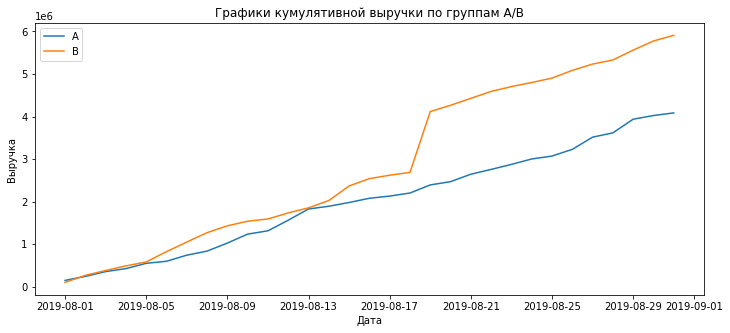

In [109]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

Выручка по группе А увеличивается на протяжение всего проводимого теста. Выручка по группе В увеличивается практически на одном уровне с группой А вплоть до 18 дня, затем происходим резкий скачёк, что можно объяснить либо тем что увеличились продажи или же увеличился чек покупки.

#### График кумулятивного среднего чека по группам.

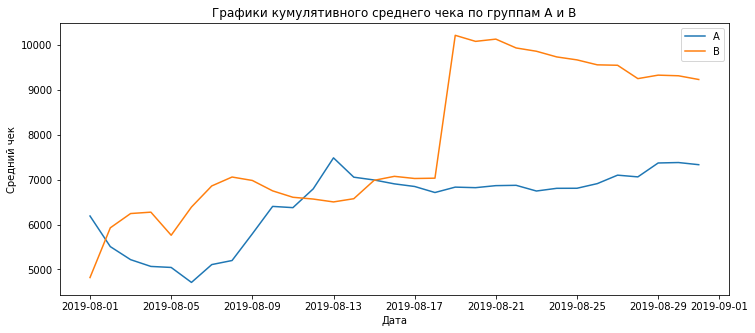

In [110]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Графики кумулятивного среднего чека по группам A и B')
plt.legend()
plt.show()

Средний чек группы А имеет как резкое падение, так и резкий рост. Средний чек группы А на протяжение всего эксперимента стремительноростёт и  так же иммет очень резкий рост приблизительно на 18 день эксперимента.

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

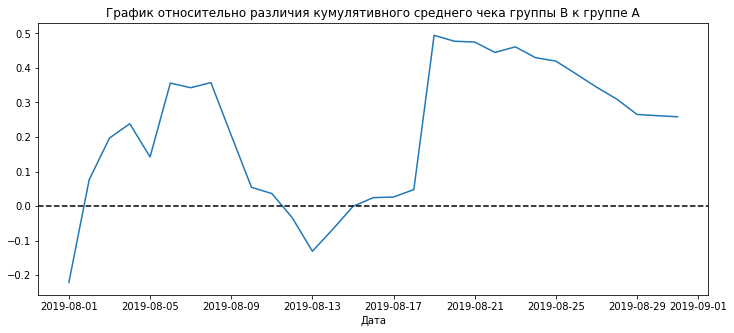

In [111]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()




График различия резко «скачет». Это указывает на выбросы и не всегда в пользу большего, есть и значительное паднение.

#### График кумулятивной конверсии по группам и дням.

Text(0.5, 1.0, 'Графики кумулятивной конверсии по группам и дням.')

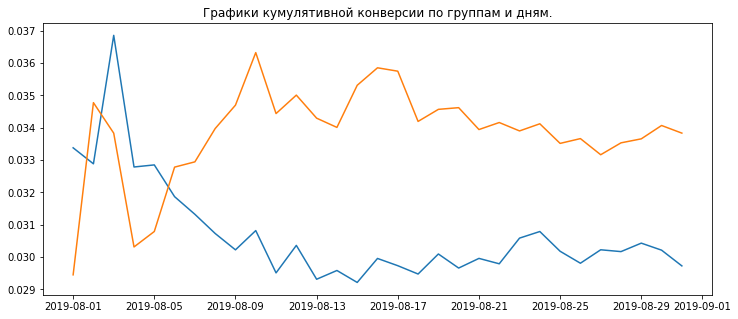

In [112]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Графики кумулятивной конверсии по группам и дням.')
#plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.25])



В группе В конверсия значительно выше.

#### График относительного изменения кумулятивной конверсии группы B к группе A.

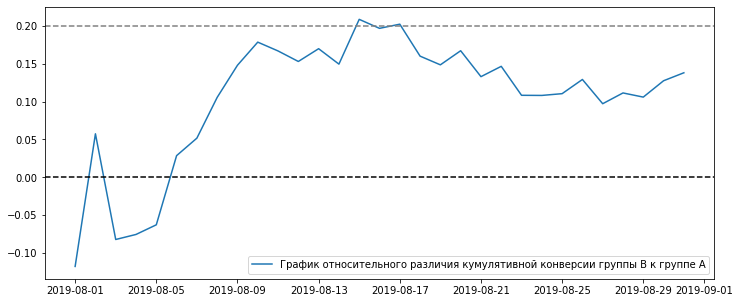

In [113]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="График относительного различия кумулятивной конверсии группы B к группе A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
#plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.25])


Конверсия в группе B начинает расти с 4 авуста, далее до конца эксперимента держится выше конверсии в группе А.

#### Точечный график количества заказов по пользователям.

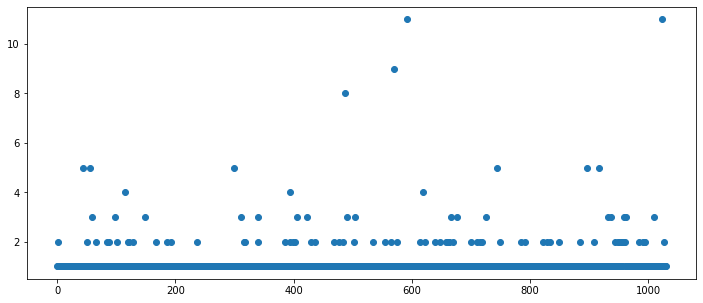

In [114]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers))) # серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(12,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()


Большинство покупателей делают заказ только один раз.

#### 95-й и 99-й перцентили количества заказов на пользователя.

In [115]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]



Не более 5% пользователей совершали два заказа, не более 1% - 4 заказа.

#### Точечный график стоимостей заказов. 

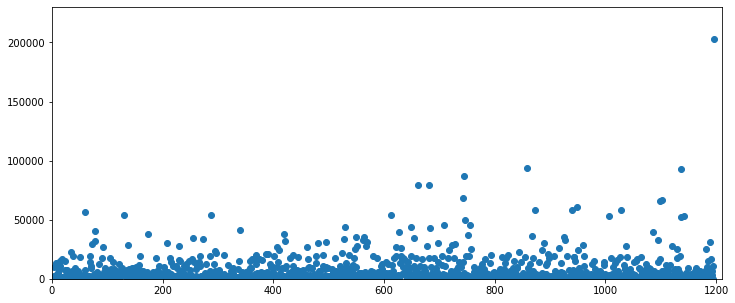

In [116]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.axis([0, 1210, 0, 230000])
plt.scatter(x_values, orders['revenue']) 
plt.show()


Судя по графику, большая часть пользователей делает покупки на сумму не более 30 000.

#### 95-й и 99-й перцентили стоимости заказов.

In [117]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]



Не более 5% пользователей делают заказы на сумму не более 28 000, не более 1% - на сумму 58 300.

####  Статистическая значимость различий в конверсии между группами по «сырым» данным.

Использую непараметрический тест Уилкоксона-Манна-Уитни, так как в данных есть выбросы, тест работает с рангами, не учитывая значения.

###### Гипотезы:

Н0 - нет статистически значимых различий между средними значениями двух выборок, конверсия группы А = конверсии группы В.

H1 - есть статистически значимые различия между средними значениями двух выборок, конверсии групп не равны
Приму уровень значимости alpha = 0.05

Посчитаю количество пользователей в выбранную дату в группе и до выбранной даты включительно в группе.

In [118]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Посчитаю количество заказов и выручку в выбранную дату в группе и суммарное число заказов и суммарную выручку до выбранной даты включительно в группе.

In [119]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Объединю полученные данные:

In [120]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаю статистическую значимость различия в конверсии между группами.

Создам переменные ordersByUsersA и ordersByUsersB со столбцами 'visitorId' и 'orders'. 
В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [121]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Введу переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [122]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,)

Применю критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

Выведу относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1, округлив до трёх знаков после запятой.

In [123]:
alpha = .05
pvalue = stats.mannwhitneyu(sampleA, sampleB,alternative="two-sided")[1]
print("{0:.3f}".format(pvalue))
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

print("Относительный прирост конверсии группы B к группе A: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)) 
                                                                                                                                           
                                                                                                                                           
                                                                                                                                           
                                                                                                                                           
                                                                                                                                           
                                                                                                                                           

0.017
Отвергаем H0: разница статистически значима
Относительный прирост конверсии группы B к группе A: 0.138


#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

###### Гипотезы:

1.Н0 - нет статистически значимых различий между средними значениями двух выборок, средний чек группы А = среднему чеку группы В.

2.H1 - есть статистически значимые различия между средними значениями двух выборок, средние чеки групп не равны.

Приму уровень значимости alpha = 0.05

In [124]:
alpha = .05
pvalue = (stats.mannwhitneyu(orders[
    orders['group']=='A']['revenue'], orders[
    orders['group']=='B']['revenue'],alternative="two-sided")[1])
print("{0:.3f}".format(pvalue))

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")
    
print('Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}'\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))     

0.729
Не получилось отвергнуть H0: вывод о различии сделать нельзя
Относительное изменение среднего чека в группе B по отношению группы A: 0.259


#### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

###### Гипотезы:

1. Н0 - нет статистически значимых различий между средними значениями двух выборок, конверсия группы А = конверсии группы В.

2. H1 - есть статистически значимые различия между средними значениями двух выборок, конверсии групп не равны.

Приму уровень значимости alpha = 0.05.

Найду количество аномальных пользователей, совершивших более двух покупок, на сумму более 30 000, введу новые переменные для обозначения порогов:

In [125]:
limit_orders = 2
limit_revenue = 30000

In [126]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > limit_orders]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > limit_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Всего аномальных пользователей', abnormalUsers.shape)

Всего аномальных пользователей (68,)


Посчитаю статистическую значимость различий в конверсии между группами теста по очищенным данным:

In [127]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [128]:
alpha = .05
pvalue = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative="two-sided")[1]
print("{0:.3f}".format(pvalue))
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

print("Относительный прирост конверсии группы B к группе A: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
Отвергаем H0: разница статистически значима
Относительный прирост конверсии группы B к группе A: 0.172


#### Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

###### Гипотезы:

1. Н0 - средний чек группы А = среднему чеку группы В.

2. H1 - средние чеки групп не равны.

Приму уровень значимости alpha = 0.05

In [129]:
alpha = .05
pvalue = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],alternative="two-sided"
        )[1]
    
print("{0:.3f}".format(pvalue))

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")
    
print('Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}'.format(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1))

0.720
Не получилось отвергнуть H0: вывод о различии сделать нельзя
Относительное изменение среднего чека в группе B по отношению группы A: -0.023


## Выводы:

1. По конверсии между группами A и B (как по сырым данным, так и по очищенным) есть статистически значимые различия;

2. По величине среднего чека между группами A и B (как по сырым данным, так и по очищенным) нет статистически значимых различий.

Тест можно остановить и считать успешным, конверсия у группы В выше, при этом величина среднего чека не изменилась.